<a href="https://colab.research.google.com/github/mechamrit/StockAnalysis/blob/master/stock5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 5
[Modern Portfolio Theory](https://www.investopedia.com/terms/m/modernportfoliotheory.asp)
Fundamental concept is of diversification and creation of an effecient way tthat can be used to choose the specific mixes odf portfolio return vs their desired level of portfolio risk.


In [0]:
# importing Libraries

import pandas as pd
import matplotlib.pyplot as plt
import math
import numpy as np

For the stock we will calculate the mean daily return and standard deviation of returns and then annualiie them with formula( annual mean = daily mean 252, annnual stdev=daily stdev sqrt(252)) to get mean expected annual return and volatility of that single stock.

In [2]:
import pandas_datareader.data as pdr
from datetime import datetime , timedelta

start = datetime(2017,7,1)
end = datetime(2019 ,7, 1)

df1 = pdr.DataReader("AAPL", 'yahoo', start, end)
df1.tail(3)

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2019-06-27,201.570007,199.570007,200.289993,199.740005,20899700.0,198.983978
2019-06-28,199.500000,197.050003,198.679993,197.919998,31110600.0,197.170853
2019-07-01,204.490005,200.649994,203.169998,201.550003,27316700.0,200.787125


In [3]:
## Calculating Daily Return or Percentage Change
df1['Returns'] = df1['Close'].pct_change()

## Mean Daily Return
mean = df1['Returns'].mean()

## Daily Standard Deviation
std = df1['Returns'].std()

annual_mean = mean * 252
annual_std = std * np.sqrt(252)

volatility = annual_std

print('Annual Mean', round(annual_mean,2))
print("Annual Vol" , round(annual_std,2))

Annual Mean 0.21
Annual Vol 0.27


We need to diversify our portfolio by choosing any 5 stocks. Assume that all 5 have the same weightage i.e. 20 %

In [4]:
##  Importing the 5 stocks
df2 = pdr.DataReader(["GOOG","MSFT","AAPL","NVDA","AMZN"],'yahoo',start,end)
df3 = df2['Close']
df3.head(3)

Symbols,AAPL,AMZN,GOOG,MSFT,NVDA
Date,,,,,
2017-07-03,143.500000,953.659973,898.700012,68.169998,139.330002
2017-07-05,144.089996,971.400024,911.710022,69.080002,143.050003
2017-07-06,142.729996,965.140015,906.690002,68.570000,143.479996


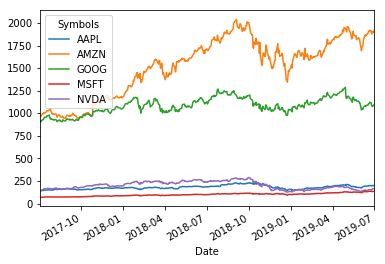

In [5]:
df3.plot()

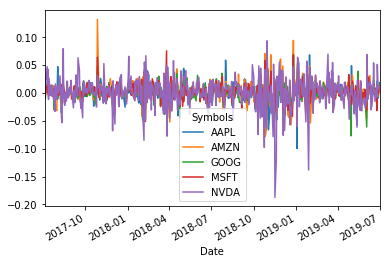

In [6]:
## Calculating Return of Every Stocks
returns = df3.pct_change()
returns.dropna(inplace=True)
returns.plot()

In [7]:
## Mean daily return and covariance of daily return
mean_daily_returns = returns.mean()
mean_daily_dev = returns.std()
cov_matrix = returns.cov()

mean_daily_returns
cov_matrix

Symbols,AAPL,AMZN,GOOG,MSFT,NVDA
Symbols,,,,,
AAPL,0.000283,0.000207,0.000165,0.000168,0.000248
AMZN,0.000207,0.000390,0.000227,0.000227,0.000325
GOOG,0.000165,0.000227,0.000245,0.000180,0.000251
MSFT,0.000168,0.000227,0.000180,0.000232,0.000247
NVDA,0.000248,0.000325,0.000251,0.000247,0.000794


In [8]:
## Giving 20% Weightage 
weights = np.array([0.2,0.2,0.2,0.2,0.2])
weights


array([0.2, 0.2, 0.2, 0.2, 0.2])

In [9]:
## Calculating with co-variance

portfolio_return = (np.sum(mean_daily_returns * weights) *25)
portfolio_std_dev = (np.sqrt(np.dot(weights.T,np.dot(cov_matrix , weights))) * np.sqrt(252))

print("Expected annual return :" + str(portfolio_return))
print("Volatility: " + str(portfolio_std_dev))

Expected annual return :0.025919510054348574
Volatility: 0.2547037930395866


Preparing the scatter plot for different weights of the individual stocks  in the portfolio axes will be returns and volatility. Colouring the data points based on the Sharpe Ratio.

In [0]:
## Select no. of points
runs = 25000
result = np.zeros((3,runs))

for i in range(runs):
  weights = np.random.random(5)
  weights /= np.sum(weights)

  portfolio_return = (np.sum(mean_daily_returns * weights) * 252)
  portfolio_std_dev = (np.sqrt(np.dot(weights.T,np.dot(cov_matrix,weights))) * np.sqrt(252))

  result[0,i] = portfolio_return
  result[1,i] = portfolio_std_dev

  result[2,i] = result[0,i] / result[1,i]

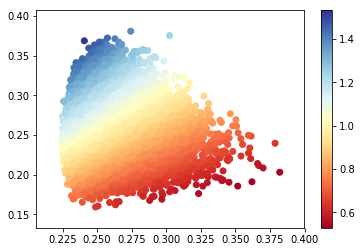

In [11]:
#convert results array to Pandas DataFrame
results_frame = pd.DataFrame(result.T,columns=['ret','stdev','sharpe'])

plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()

In [0]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()]
min_vol_port = results_frame.iloc[results_frame['stdev'].idxmin()]

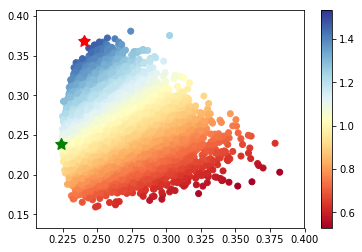

In [13]:
plt.scatter(results_frame.stdev,results_frame.ret,c=results_frame.sharpe,cmap='RdYlBu')
plt.colorbar()
plt.scatter(max_sharpe_port[1],max_sharpe_port[0],marker=(5,1,0),color='r',s=150)
plt.scatter(min_vol_port[1],min_vol_port[0],marker=(5,1,0),color='g',s=150)